# Hotel Booking Cancellation Prediction - EDA
**Objective:** Predict hotel booking for a next booking of the hotel.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from randomcolor import RandomColor
%matplotlib inline

## Importing the data

In [2]:
data= pd.read_csv('/home/diwas/Documents/DevStuff/Hotel Booking Cancellation/data/raw/hotel_booking.csv')

## Data Exploration

In [198]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [199]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [200]:
# Checking for missing valeues
null_values = data.isnull().sum()
null_values[null_values > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [201]:
# Removing the unnecessary columns
data= data.drop(columns = ['name','email', 'credit_card', 'company', 'phone-number', 'adr'], axis = 1)

In [202]:
# Checking for duplicated values
data.duplicated().sum()

32931

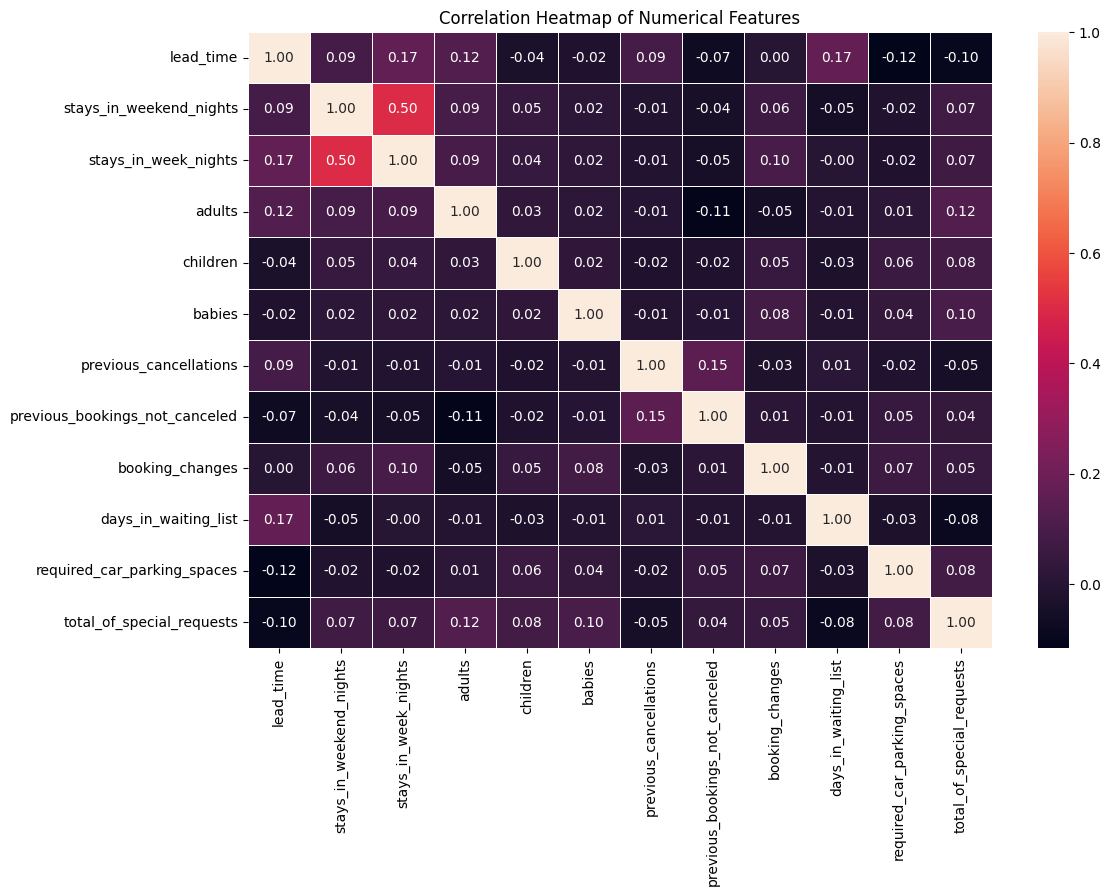

In [203]:
# Correlation matrix
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                      'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Analyzing Numerical Variables

<Axes: xlabel='is_canceled', ylabel='count'>

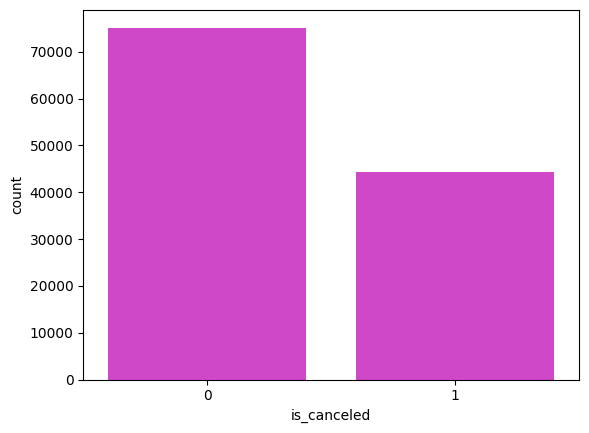

In [204]:
sns.countplot(data = data, x = 'is_canceled', color = RandomColor().generate()[0])

<Axes: xlabel='stays_in_week_nights', ylabel='stays_in_weekend_nights'>

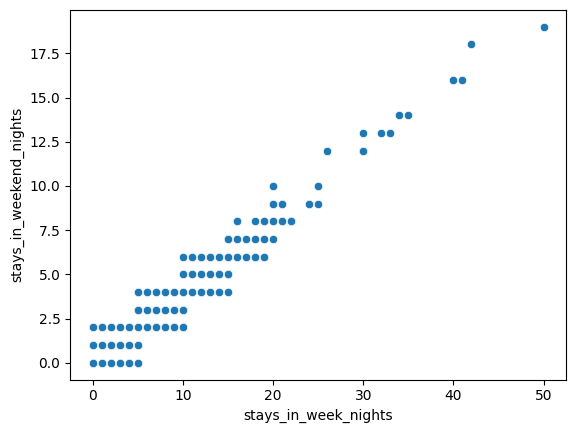

In [205]:
sns.scatterplot(x= data['stays_in_week_nights'], y = data['stays_in_weekend_nights'])

### Analyzing Numerical Variables

### Lead time Analysis

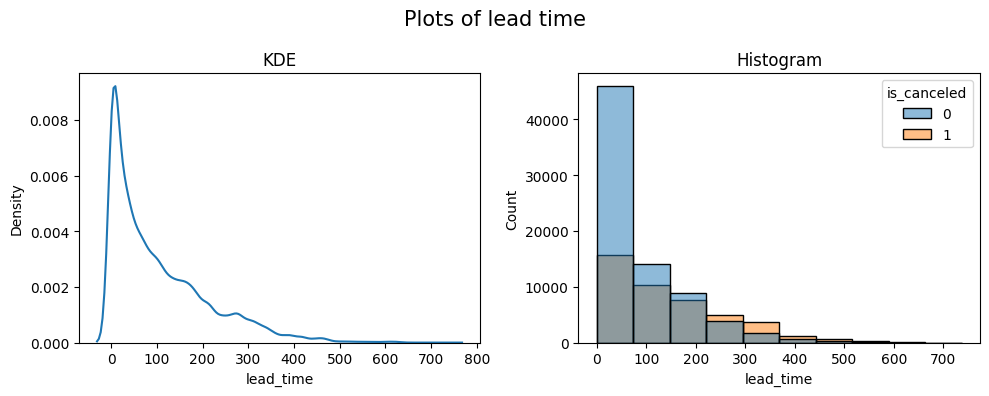

In [206]:
# Leadtime analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Plots of lead time', fontsize=15)
# KDE plot
sns.kdeplot(data=data, x='lead_time', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=data, x='lead_time', bins=10, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations** 
* Bookings with high lead_time(days between arrival and booking) is more likely to be cancelled.
* Positively skewed data.

### Analysis of stays_in_weekend_nights/ stays_in_week_nights

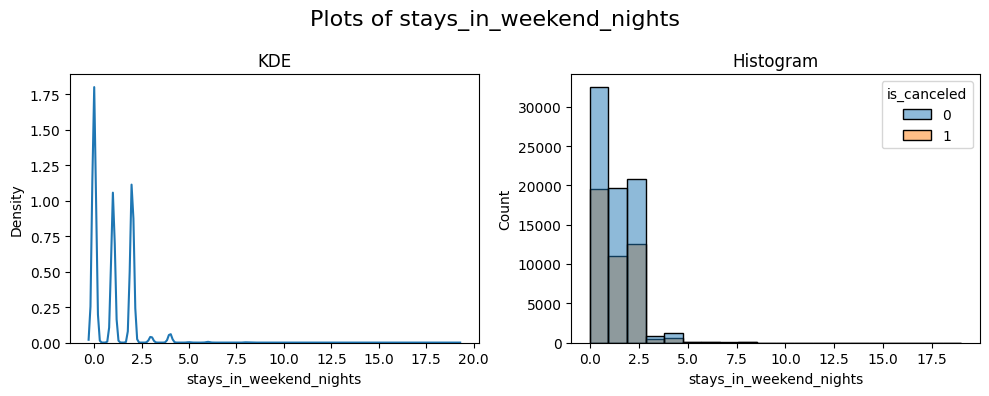

In [207]:
# Making plots of stays in weekend nights
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Plots of stays_in_weekend_nights', fontsize=16)
# KDE plot
sns.kdeplot(data=data, x='stays_in_weekend_nights', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=data, x='stays_in_weekend_nights', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

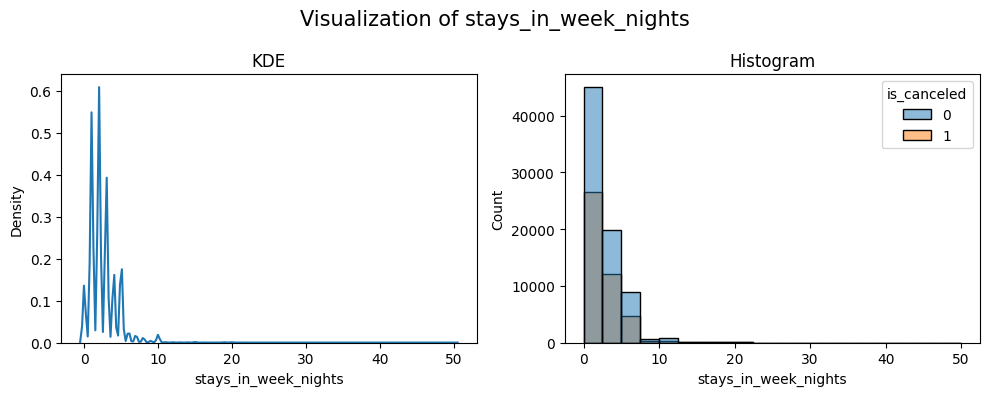

In [208]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Visualization of stays_in_week_nights', fontsize=15)
# KDE plot
sns.kdeplot(data=data, x='stays_in_week_nights', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=data, x='stays_in_week_nights', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

In [209]:
# Creating new feature total nights stayed
total_stay_nights = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

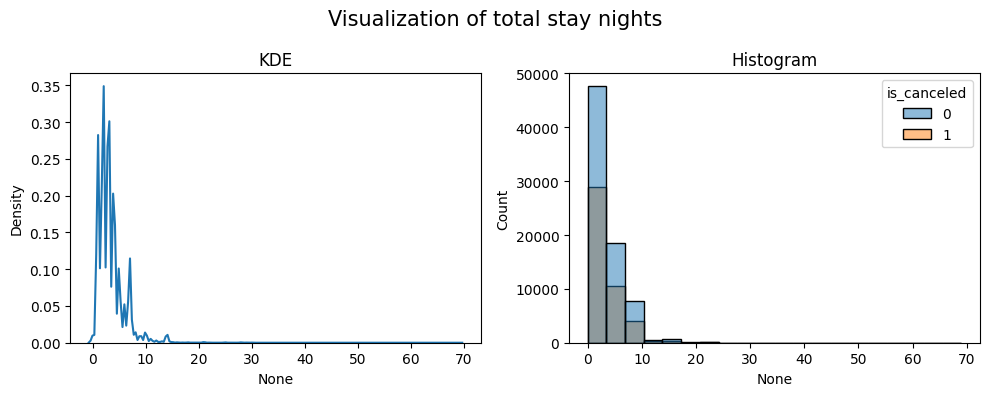

In [210]:
# Visualizing total_members
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Visualization of total stay nights', fontsize=15)
# KDE plot
sns.kdeplot(x=total_stay_nights, ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(x=total_stay_nights, bins=20, ax=axes[1], hue = data['is_canceled'])
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations** 
* No such remarkable effect of stays_in_week/weekend_nights variable on cancellation.
* Both stays_in_week/weekend_nights are positively skewed.
* Presense of outliers.

We created new variable total_stay_nights

### Analysis of no. of members babies, adults, children

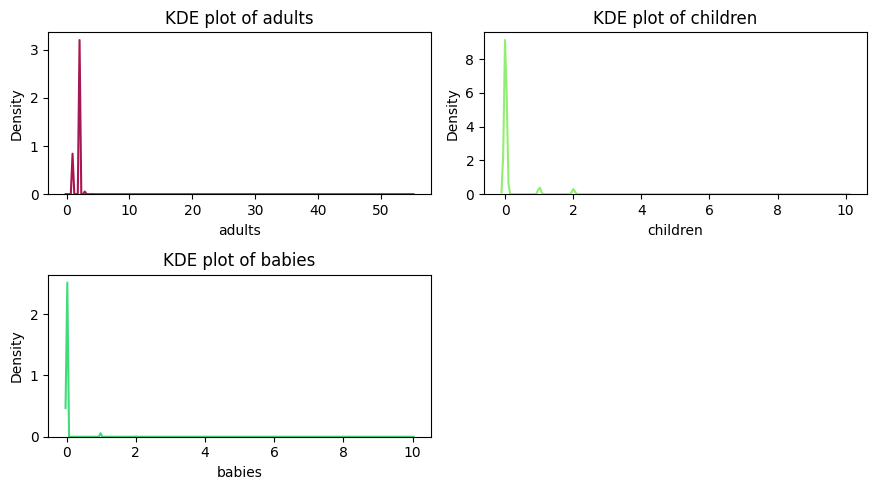

In [211]:
# Explore distributions of these variable
cols_to_plot = ['adults', 'children', 'babies']

# Create subplots
plt.figure(figsize=(9, 5))
for i, feature in enumerate(cols_to_plot):
    plt.subplot(-(-3 // 2), 2, i+1)
    sns.kdeplot(data[feature], color = RandomColor().generate()[0])
    plt.title(f'KDE plot of {feature}')

plt.tight_layout()

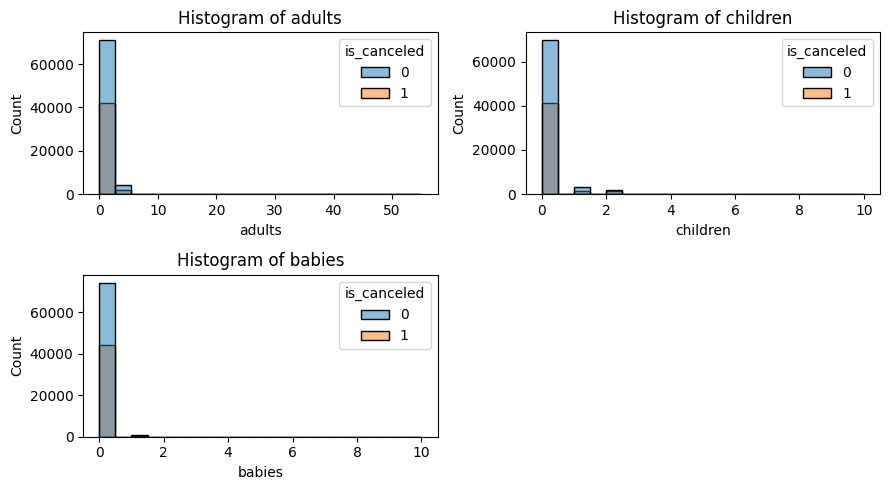

In [212]:
# Create subplots
plt.figure(figsize=(9, 5))
for i, feature in enumerate(cols_to_plot):
    plt.subplot(-(-3 // 2), 2, i+1)
    sns.histplot(data= data, x = feature, bins = 20, hue = 'is_canceled')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()

In [213]:
# Creating a new feature total members
total_members = data['adults'] + data['children'] + data['babies']

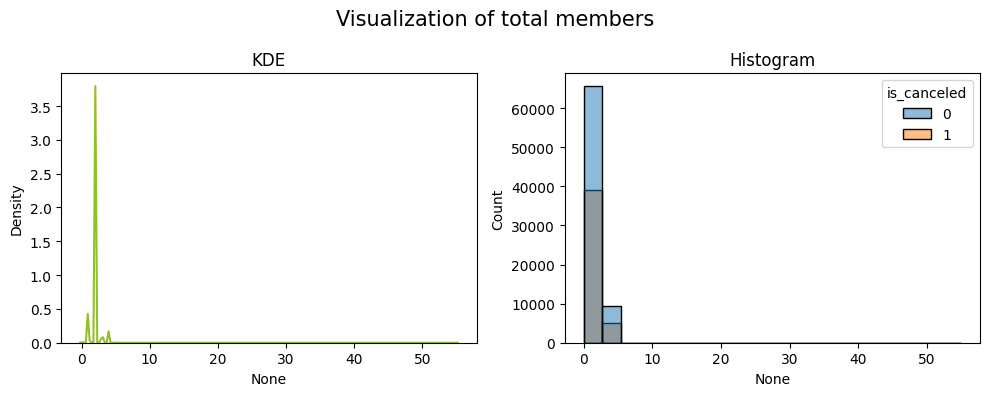

In [214]:
# Visualizing total_members
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Visualization of total members', fontsize=15)
# KDE plot
sns.kdeplot(x=total_members, ax=axes[0], color = RandomColor().generate()[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(x=total_members, bins=20, ax=axes[1], hue = data['is_canceled'])
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations**
* All of the variables denoting members are positively skewed.
* Presense of outliers can be seen.

We created new variable total_members

### Impact of Previous cancellations.

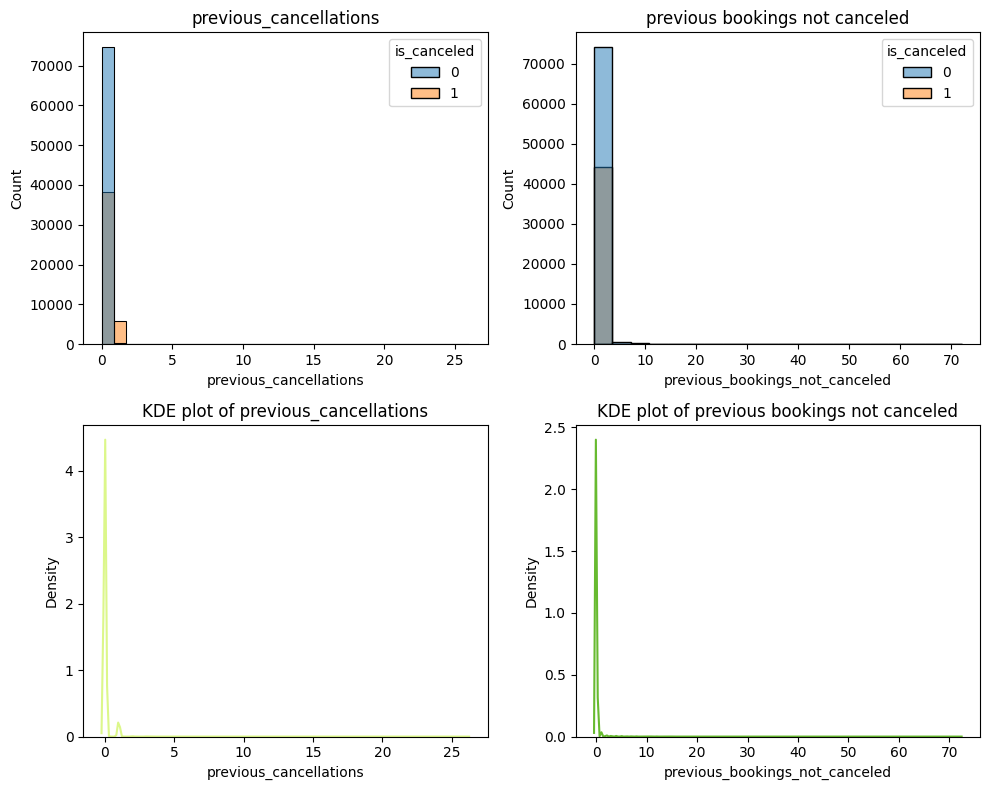

In [215]:
# Visualizing previous cancellation and not previous cancellations 
# Assuming 'is_canceled' is a categorical variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Creating histograms with hue
sns.histplot(data=data, x='previous_cancellations', ax=axes[0, 0], bins=30, hue='is_canceled')
axes[0, 0].set_title('previous_cancellations')

sns.histplot(data=data, x='previous_bookings_not_canceled', bins=20, ax=axes[0, 1], hue='is_canceled')
axes[0, 1].set_title('previous bookings not canceled')

# Creating kdeplots
sns.kdeplot(data=data, x='previous_cancellations', ax=axes[1, 0], color = RandomColor().generate()[0])
axes[1, 0].set_title('KDE plot of previous_cancellations')

sns.kdeplot(data=data, x='previous_bookings_not_canceled', ax=axes[1, 1], color = RandomColor().generate()[0])
axes[1, 1].set_title('KDE plot of previous bookings not canceled')

# Adjust layout
plt.tight_layout()


In [216]:
# Creating a new feature total bookings
total_bookings = data['previous_cancellations'] + data['previous_bookings_not_canceled']

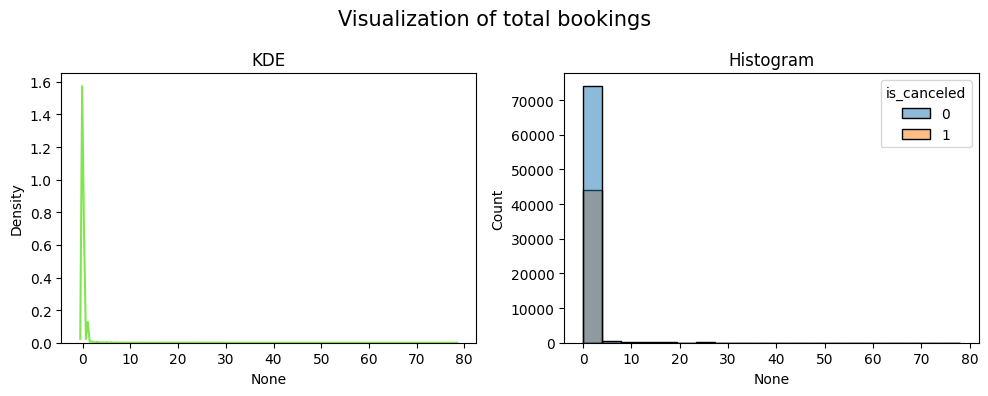

In [217]:
# Creating plots of total bookings
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Visualization of total bookings', fontsize=15)
# KDE plot
sns.kdeplot(x=total_bookings, ax=axes[0], color = RandomColor().generate()[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(x=total_bookings, bins=20, ax=axes[1], hue = data['is_canceled'])
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations**
* Person with high number of previous cancellations are more likely to cancel the booking.
* Skewed distribution of previous_cancellation/ total_cancellation.

Created new variable total_bookings

### What if customer makes changes in booking ?

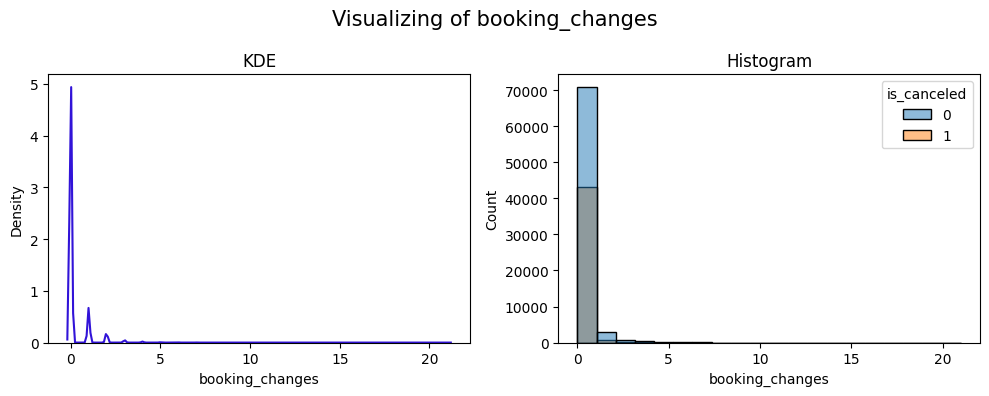

In [218]:
## Creating plots of total bookings
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.suptitle('Visualizing of booking_changes', fontsize=15)
# KDE plot
sns.kdeplot(data=data, x='booking_changes', ax=axes[0], color = RandomColor().generate()[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=data, x='booking_changes', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations**
* Positive skewed data.

### Other numerical Variables

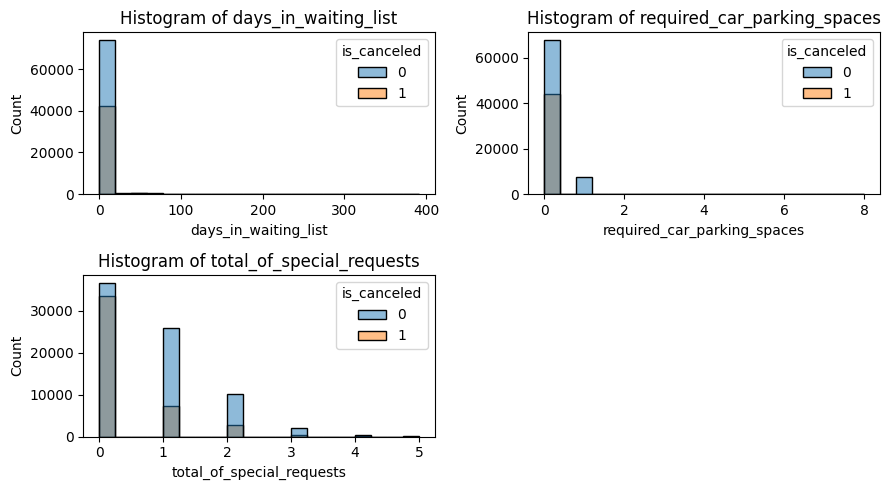

In [219]:
# Explore numerical features
cols_to_plot = ['days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

plt.figure(figsize=(9, 5))
for i, feature in enumerate(cols_to_plot):
    plt.subplot(-(-3 // 2), 2, i+1)
    sns.histplot(data = data, x = feature, bins = 20, hue = 'is_canceled')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()

**Insights**
- Less risk of cancel if total_of_special_requests are higher .
- Those who require car paking spaces also has less cancel rates.

## Analyze Categorical Variables

In [5]:
import warnings
warnings.filterwarnings("ignore")

### Hotel wise cancellation analysis

In [221]:
# Find cancellation rates hotel wise
data_hotel = data.groupby('hotel')['is_canceled'].agg(['count', 'sum']).reset_index()
data_hotel['cancellation_pct'] = data_hotel['sum'] / data_hotel['count'] * 100

In [222]:
data_hotel.head()

,hotel,count,sum,cancellation_pct
0,City Hotel,79330,33102,41.726963
1,Resort Hotel,40060,11122,27.763355


Text(0.5, 1.0, 'Hotel wise cancellation rates')

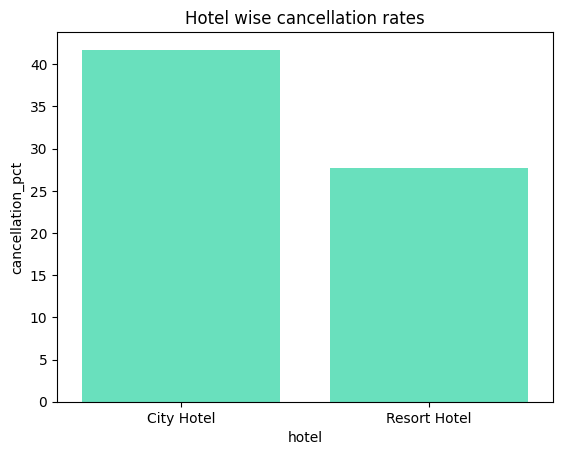

In [223]:
# Creating visualization for hotel wise cancellation rates
sns.barplot(data = data_hotel, x = 'hotel', y = 'cancellation_pct',color = RandomColor().generate()[0])
plt.title('Hotel wise cancellation rates')

**Insights from barplot**
- City hotel has more cancellation rate as compared to resort.
- Around 41% of bookings made for city hotel are canceled where 27% for resort hotel.

### Country wise cancellation rates

In [224]:
# Calculate country wise cancellatin rates
data_country = data.groupby('country')['is_canceled'].agg(['count', 'sum']).reset_index()
data_country['cancellation_pct'] = data_country['sum'] / data_country['count']

In [225]:
data_country.head()

,country,count,sum,cancellation_pct
0,ABW,2,0,0.000000
1,AGO,362,205,0.566298
2,AIA,1,0,0.000000
3,ALB,12,2,0.166667
4,AND,7,5,0.714286


In [226]:
# Ignoring countries with less than 1000 total bookings
data_country = data_country[data_country['count'] > 1000]

Text(0.5, 1.0, 'Country Wise Cancellation Rates')

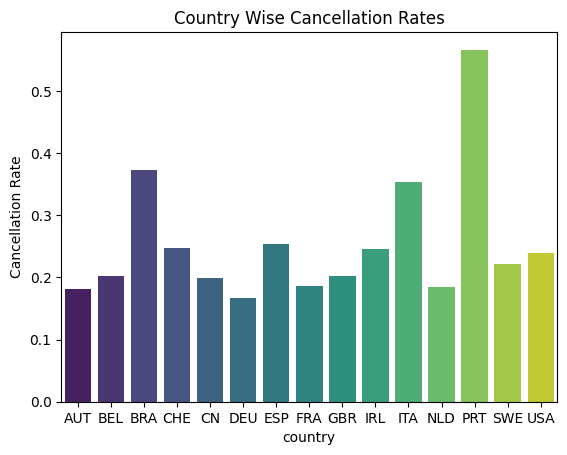

In [227]:
# Creating bar plor for country wise cancellation 
sns.barplot(data = data_country, x = 'country', y = 'cancellation_pct', palette='viridis')
plt.ylabel('Cancellation Rate')
plt.title('Country Wise Cancellation Rates')

**Conclusions**
- PRT(Portugal) has highest cancellation rate.
- Many countries AUT(Austria) DEU(Germany) NLD(Neatherlands) has relatively low cancellation rates.

### Impact of Meal Plan 

In [228]:
# Calculating cancellation rates meal plan wise
value_counts = data['meal'].value_counts()

<Axes: xlabel='meal', ylabel='count'>

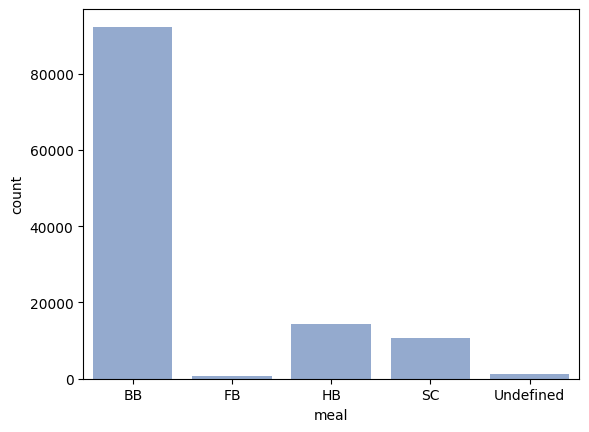

In [229]:
# Creating barplot of meal plans and count
sns.countplot(data = data, x= 'meal', color = RandomColor().generate()[0])

In [230]:
# Creating data for cancellation rate for meal plan
data_meal = data.groupby('meal')['is_canceled'].agg(['count', 'sum']).reset_index()
data_meal['cancellation_pct'] = data_meal['sum'] / data_meal['count'] * 100
data_meal.head()

,meal,count,sum,cancellation_pct
0,BB,92310,34510,37.384899
1,FB,798,478,59.899749
2,HB,14463,4984,34.460347
3,SC,10650,3966,37.239437
4,Undefined,1169,286,24.465355


Text(0.5, 1.0, 'Meal wise cancellation rates')

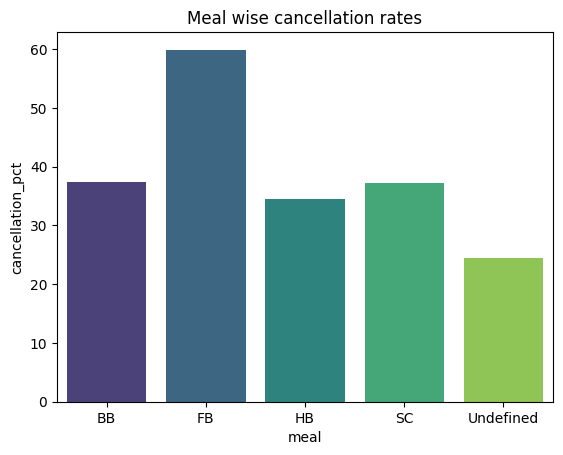

In [231]:
# Creating bar plot meal plean cancellation rates
sns.barplot(data = data_meal, x = 'meal', y = 'cancellation_pct',palette='viridis')
plt.title('Meal wise cancellation rates')

**Observations**
- Presense of missing values in form of "Undefined"
- Booking's with FB(Full Board) meal plan has most cancellation rates.

### Arrival time(year, month, week_number, day_of_month) analysis

#### Analyzing arrival_date_year 

In [232]:
# Calculating total cancellation in each year
data_arrival_year = data.groupby('arrival_date_year')['is_canceled'].agg(['sum']).reset_index()
data_arrival_year.head()

,arrival_date_year,sum
0,2015,8142
1,2016,20337
2,2017,15745


Text(0.5, 1.0, 'Bar Plot of Total Cancellation in Each Year')

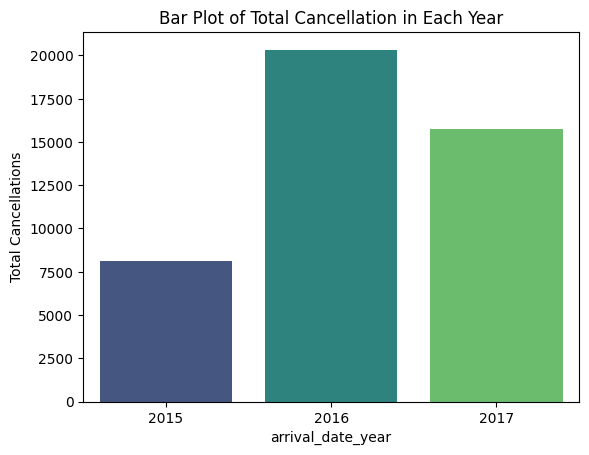

In [233]:
# Lineplot of arrival_date_year with total cancellations
sns.barplot(data = data_arrival_year, x = 'arrival_date_year', y = 'sum', palette='viridis')
plt.ylabel('Total Cancellations')
plt.title('Bar Plot of Total Cancellation in Each Year')


In [234]:
# Removing arrival_date_year becuse not providing much information
data= data.drop(columns = ['arrival_date_year'])

#### Analyzing arrival date month

In [235]:
# Calculate month wise cancellation rattes
data_arrival_month = data.groupby('arrival_date_month')['is_canceled'].agg(['count', 'sum']).reset_index()
data_arrival_month['cancellation_pct'] = data_arrival_month['sum'] / data_arrival_month['count']

In [236]:
# Sort the month in order of increasing month
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June':6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
data['arrival_date_month_num'] = data['arrival_date_month'].map(month_map)
sorted_data= data.sort_values(by=['arrival_date_month_num'],ascending=True)
data_arrival_month.head()

,arrival_date_month,count,sum,cancellation_pct
0,April,11089,4524,0.407972
1,August,13877,5239,0.377531
2,December,6780,2371,0.349705
3,February,8068,2696,0.334160
4,January,5929,1807,0.304773


Text(0.5, 1.0, 'Bar Plot of Cancellation Percentage for Arrival Date Month')

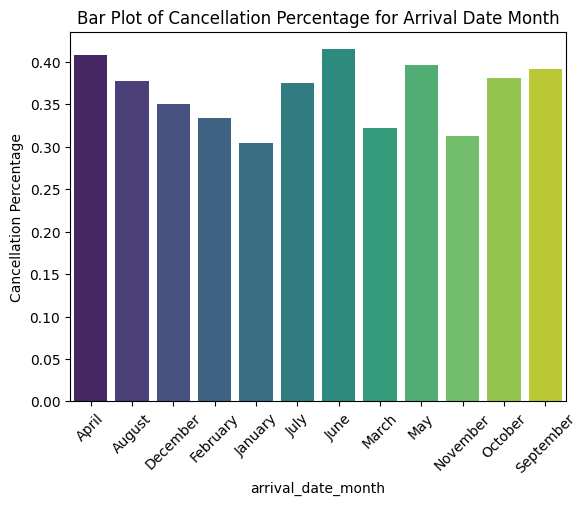

In [237]:
sns.barplot(data = data_arrival_month, x = 'arrival_date_month', y = 'cancellation_pct', palette='viridis')
plt.xticks(rotation = 45)
plt.ylabel('Cancellation Percentage')
plt.title('Bar Plot of Cancellation Percentage for Arrival Date Month')

**Insights**
- Booking made in the month of April and June has most risk to be canceled.
- Where bookings in november january march are less likely to be canceled.
- Cancellation rates are increasing from December to June.
- From June- November is seems to be decreasing cancellation rates.

#### Analyze arrival date week number

In [238]:
# Calculate arrival date week wise cancellation rates
data_arrival_week_number = data.groupby('arrival_date_week_number')['is_canceled'].agg(['count', 'sum']).reset_index()
data_arrival_week_number['cancellation_pct'] = data_arrival_week_number['sum'] / data_arrival_week_number['count']

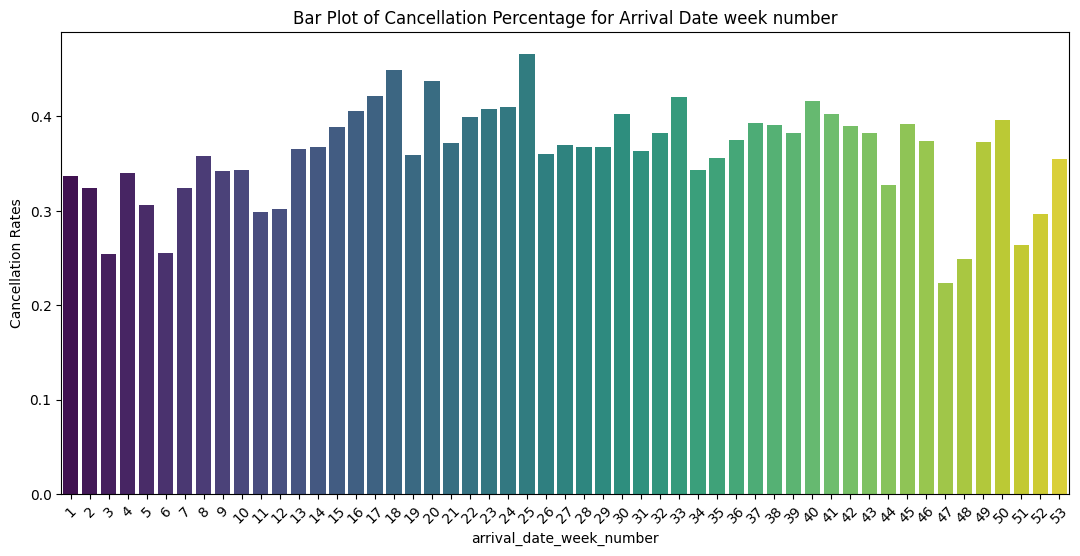

In [239]:
# Barplot of arrival date week number
plt.figure(figsize = (13, 6))
sns.barplot(data = data_arrival_week_number, x = 'arrival_date_week_number', y = 'cancellation_pct', palette='viridis')
plt.ylabel('Cancellation Rates')
plt.title('Bar Plot of Cancellation Percentage for Arrival Date week number')
plt.xticks(rotation = 45)
plt.show()

**arrival_date_week_number:** is week number of that year in which customer will be arriving at hotel.For example if customer arrives in Januray 29 then arrival_date_week_number will be 5.

**Insights**
- Plot has Same behaviour as of arrival_date_month with more detail.

#### Analyzing arrival_date_day_of_month

In [240]:
# Calculate arrival date day of month wise cancellation rates
data_arrival_day_of_month = data.groupby('arrival_date_day_of_month')['is_canceled'].agg(['count', 'sum']).reset_index()
data_arrival_day_of_month['cancellation_pct'] = data_arrival_day_of_month['sum'] / data_arrival_day_of_month['count']
data_arrival_day_of_month = data_arrival_day_of_month.sort_values(by = 'arrival_date_day_of_month')

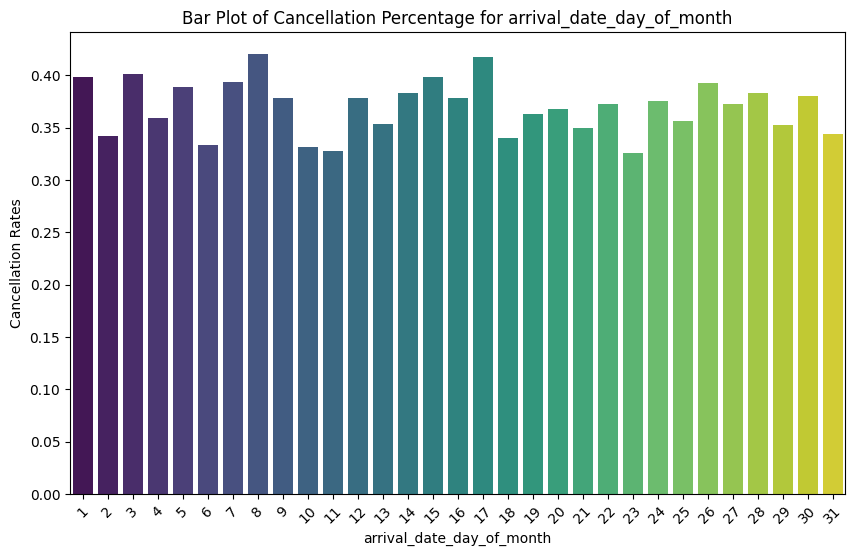

In [241]:
# Barplot of arrival 
plt.figure(figsize = (10, 6))
sns.barplot(data = data_arrival_day_of_month, x = 'arrival_date_day_of_month', y = 'cancellation_pct', palette='viridis')
plt.ylabel('Cancellation Rates')
plt.title('Bar Plot of Cancellation Percentage for arrival_date_day_of_month')
plt.xticks(rotation = 45)
plt.show()

### What if guest is repeated

In [242]:
# Checking for unique values
data['is_repeated_guest'].value_counts()

is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64

In [243]:
# Calculating cancellation percentage of repeated and not repeated guest
data_is_repeated_guest = data.groupby('is_repeated_guest')['is_canceled'].agg(['count', 'sum']).reset_index()
data_is_repeated_guest['cancellation_pct'] = data_is_repeated_guest['sum'] / data_is_repeated_guest['count']

Text(0.5, 1.0, 'Bar Plot Showing Cancellation Rates For Repeated & Non Repeated Guests')

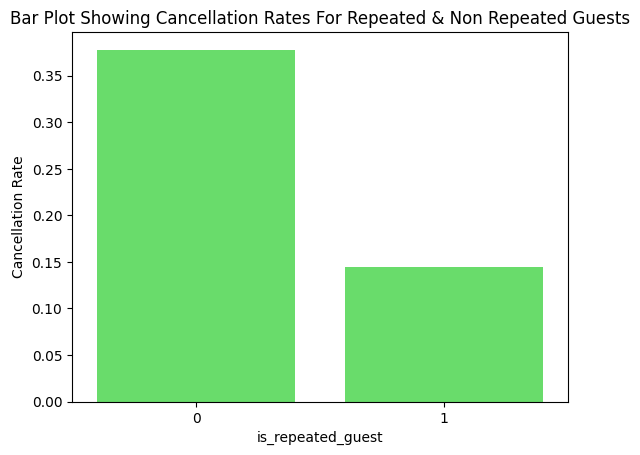

In [244]:
# Creating count plot
sns.barplot(data = data_is_repeated_guest, x = 'is_repeated_guest', y = 'cancellation_pct', color = RandomColor().generate()[0])
plt.ylabel('Cancellation Rate')
plt.title('Bar Plot Showing Cancellation Rates For Repeated & Non Repeated Guests')

**Insights**
- Most of the guest are not repeated.
- Most of cancellation's are made by non repeated guests
- Only 14% of repeated guests cancel where this value goes to 37% when it comes to non repeated guests.

#### Analyze market segment

In [245]:
# Find unique vales
data['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

Text(0.5, 1.0, 'Cancellation Rates For Different Marcket Segment')

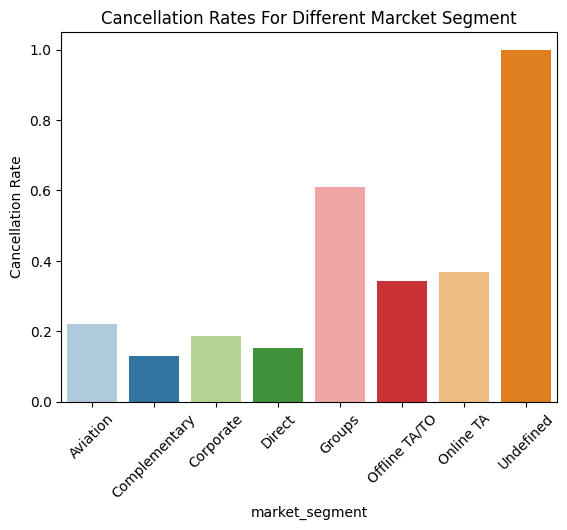

In [246]:
# Calculating cancellation rate

data_market_segment = data.groupby('market_segment')['is_canceled'].agg(['count', 'sum']).reset_index()
data_market_segment['cancellation_pct'] = data_market_segment['sum'] / data_market_segment['count']
# Creating plot
sns.barplot(data = data_market_segment, x = 'market_segment', y = 'cancellation_pct', palette = 'Paired')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation = 45)
plt.title('Cancellation Rates For Different Marcket Segment')


**Insights**
- Groups has most of the cancellation.
- Presense of missing values in form of Undefined

### Analyze distribution channel

In [247]:
# Find unique vales
data['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

Text(0.5, 1.0, 'Cancellation Rates For different distribution_channel')

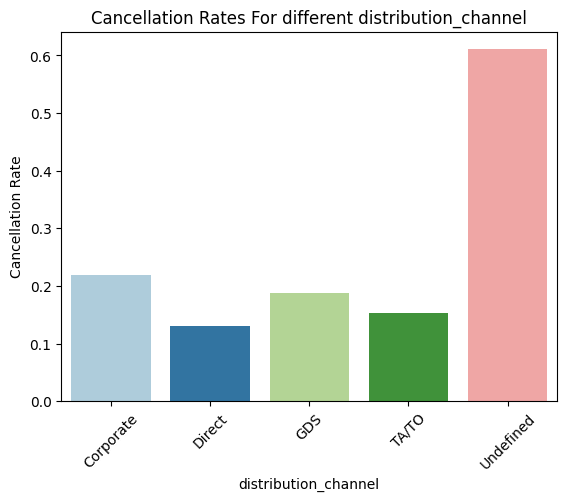

In [248]:
# Calculating cancellation rate
data_distribution_channel = data.groupby('distribution_channel')['is_canceled'].agg(['count', 'sum']).reset_index()
data_distribution_channel['cancellation_pct'] = data_market_segment['sum'] / data_market_segment['count']
# Creating plot
sns.barplot(data= data_distribution_channel, x = 'distribution_channel', y = 'cancellation_pct', palette = 'Paired')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation = 45)
plt.title('Cancellation Rates For different distribution_channel')


**Insights**
- Corporate has most cancellation rates.
- Presense of missing values i.e Undefined.

#### reserved/assigned_room_type anaysis

In [249]:
data[['reserved_room_type']].value_counts()

reserved_room_type
A                     85994
D                     19201
E                      6535
F                      2897
G                      2094
B                      1118
C                       932
H                       601
P                        12
L                         6
Name: count, dtype: int64

In [250]:
data[['assigned_room_type']].value_counts()

assigned_room_type
A                     74053
D                     25322
E                      7806
F                      3751
G                      2553
C                      2375
B                      2163
H                       712
I                       363
K                       279
P                        12
L                         1
Name: count, dtype: int64

Text(0.5, 1.0, 'Total Cancellation For different assigned_room_type')

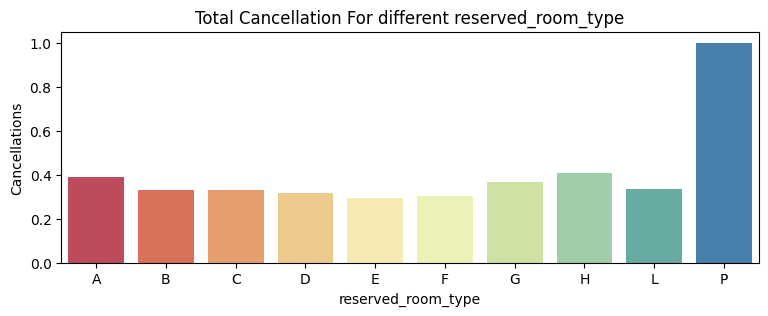

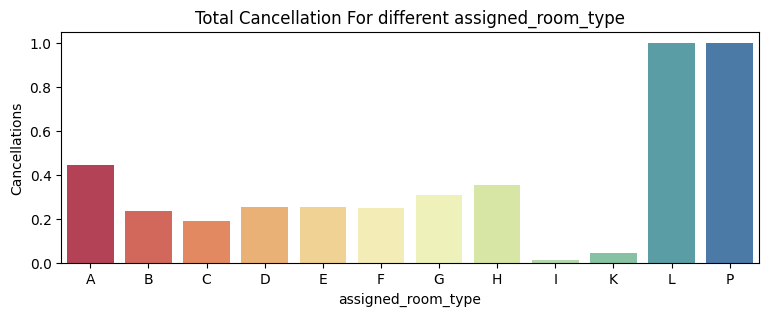

In [251]:
# Calculating cancellation rate
plt.figure(figsize=(9, 3))
variable = 'reserved_room_type'
cancel_rate_data= data.groupby(variable)['is_canceled'].agg(['count', 'sum']).reset_index()
cancel_rate_data['cancellation_pct'] = cancel_rate_data['sum'] / cancel_rate_data['count']
# Creating plot
sns.barplot(data= cancel_rate_data, x = variable, y = 'cancellation_pct', palette = "Spectral")
plt.ylabel('Cancellations')
plt.title(f'Total Cancellation For different {variable}')

# For assigned room type
plt.figure(figsize=(9, 3))
variable = 'assigned_room_type'
cancel_rate_data= data.groupby(variable)['is_canceled'].agg(['count', 'sum']).reset_index()
cancel_rate_data['cancellation_pct'] = cancel_rate_data['sum'] / cancel_rate_data['count']
# Creating plot
sns.barplot(data= cancel_rate_data, x = variable, y = 'cancellation_pct', palette = "Spectral")
plt.ylabel('Cancellations')
plt.title(f'Total Cancellation For different {variable}')



### deposit_type variable

In [252]:
# Check unique values
data[['deposit_type']].value_counts()

deposit_type
No Deposit      104641
Non Refund       14587
Refundable         162
Name: count, dtype: int64

Text(0.5, 1.0, 'Cancellation Rates For different deposit_type')

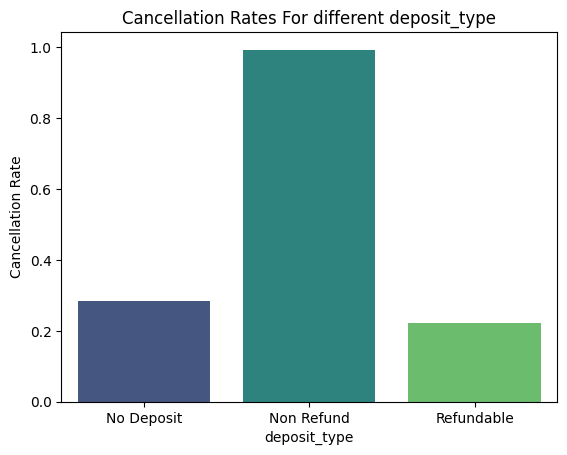

In [253]:
variable = 'deposit_type'
cancel_rate_data= data.groupby(variable)['is_canceled'].agg(['count', 'sum']).reset_index()
cancel_rate_data['cancellation_pct'] = cancel_rate_data['sum'] / cancel_rate_data['count']
# Creating plot
sns.barplot(data= cancel_rate_data, x = variable, y = 'cancellation_pct', palette = 'viridis')
plt.ylabel('Cancellation Rate')
plt.title(f'Cancellation Rates For different {variable}')

- High risk of cancellation with Non Refund deposit type.

#### customer_type variable

In [254]:
data['customer_type'].value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

Text(0.5, 1.0, 'Cancellation Rates For different customer_type')

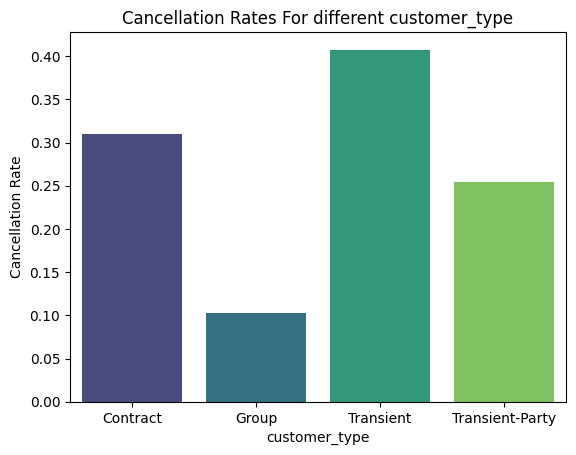

In [255]:
variable = 'customer_type'
cancel_rate_data= data.groupby(variable)['is_canceled'].agg(['count', 'sum']).reset_index()
cancel_rate_data['cancellation_pct'] = cancel_rate_data['sum'] / cancel_rate_data['count']
# Creating plot
sns.barplot(data= cancel_rate_data, x = variable, y = 'cancellation_pct', palette = 'viridis')
plt.ylabel('Cancellation Rate')
plt.title(f'Cancellation Rates For different {variable}')

- Customer Type Transient has highest cancel rates.

#### revervation_status variable

In [256]:
data['reservation_status'].value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

- We can remove reservation_status variabe

### agent variable

In [257]:
data['agent'].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

* agent variable is an id for agent which is not required for modeling thus we can remove it.

### Hypothesis testing

In [258]:
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']


In [259]:
from scipy.stats import shapiro

In [260]:
# Normality test for numerical features
normal_cols= []
for feature in numerical_features:
    stat, p_value = shapiro(data[feature])
    print(f'{feature}: test_stat,',str(stat)[0:4], 'p_value', p_value)

lead_time: test_stat, 0.85 p_value 0.0
stays_in_weekend_nights: test_stat, 0.78 p_value 0.0
stays_in_week_nights: test_stat, 0.80 p_value 0.0
adults: test_stat, 0.49 p_value 0.0
children: test_stat, nan p_value 1.0
babies: test_stat, 0.05 p_value 0.0
previous_cancellations: test_stat, 0.06 p_value 0.0
previous_bookings_not_canceled: test_stat, 0.06 p_value 0.0
booking_changes: test_stat, 0.37 p_value 0.0
days_in_waiting_list: test_stat, 0.11 p_value 0.0
required_car_parking_spaces: test_stat, 0.25 p_value 0.0
total_of_special_requests: test_stat, 0.71 p_value 0.0


# Deal with missing values

In [261]:
# Dealing with Undefind in categorical columns
for col in data.columns:
    len_undata= len(data[data[col] == 'Undefined'])
    if len_undata > 0:
        print(f'{col}: has total undefined of {len_undata}')

meal: has total undefined of 1169
market_segment: has total undefined of 2
distribution_channel: has total undefined of 5


In [262]:
# Impute Undefined values with the most frequent category
data['meal'].replace('Undefined', data['meal'].mode()[0], inplace=True)
data['market_segment'].replace('Undefined', data['market_segment'].mode()[0], inplace=True)
data['distribution_channel'].replace('Undefined', data['distribution_channel'].mode()[0], inplace=True)

In [263]:
# Dealing with NaN values
# Impure of cateogircal columns
data['country'].fillna(data['country'].mode()[0], inplace=True)
data['agent'].fillna(data['agent'].mode()[0], inplace=True)

# Impute of continous values
data['children'].fillna(data['children'].median(), inplace=True)

### Dealing with outliers

In [264]:
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

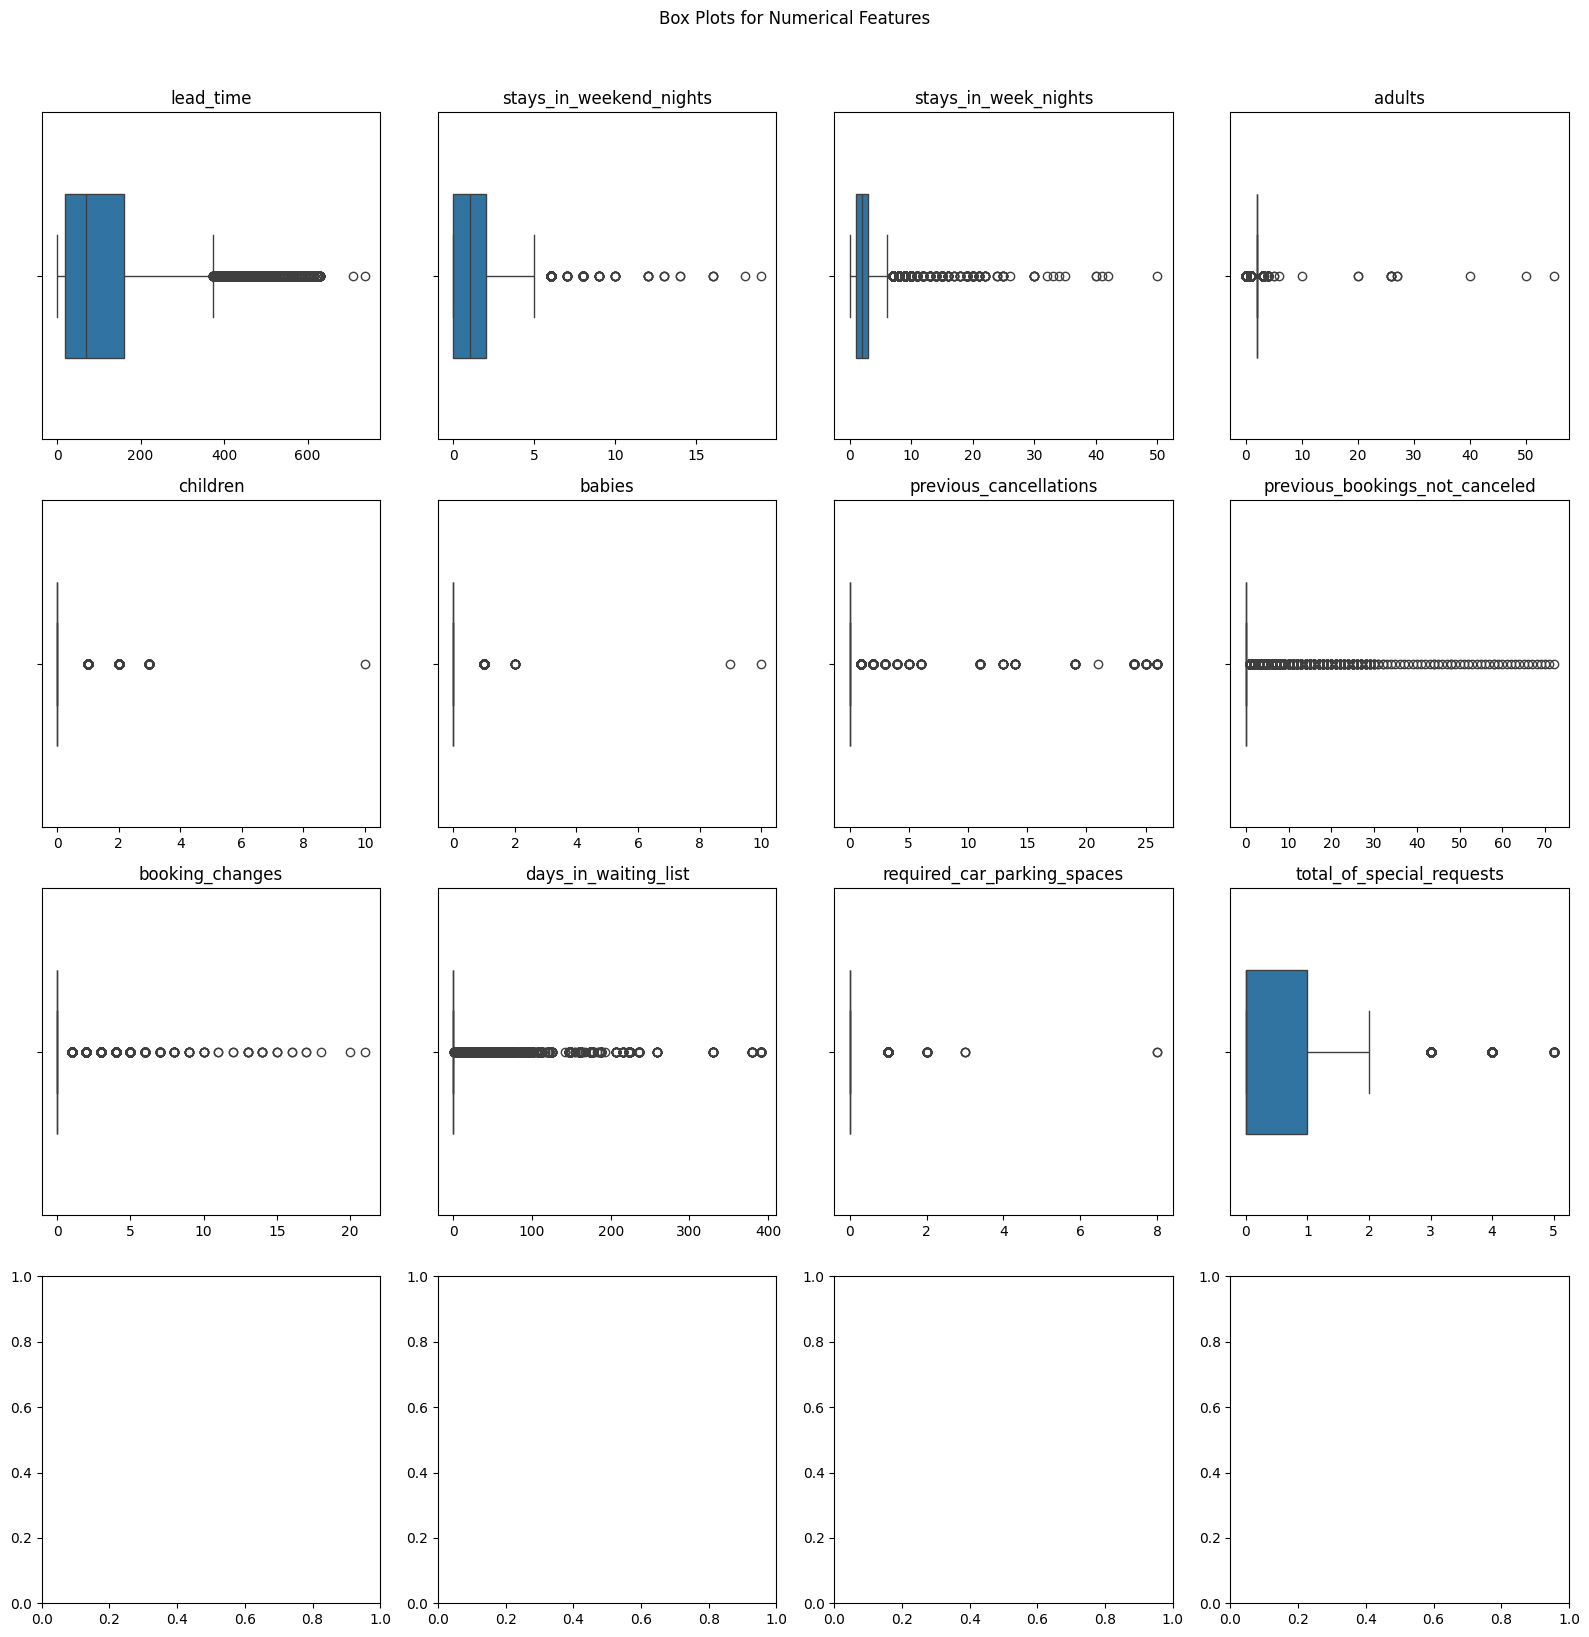

In [265]:
# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
fig.suptitle('Box Plots for Numerical Features', y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create individual box plots for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i], width=0.5)
    axes[i].set_title(feature)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [266]:
# Function to find columns with outliers using IQR method
def get_columns_with_outliers_iqr(dataframe, features):
    columns_with_outliers = []
    
    for feature in features:
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Identify columns with outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)][feature]

        if not outliers.empty:
            columns_with_outliers.append(feature)

    return columns_with_outliers

# Get columns with outliers using IQR method
outlier_columns = get_columns_with_outliers_iqr(data, numerical_features)

# Display the columns with outliers
print("Columns with outliers using IQR method:", outlier_columns)

Columns with outliers using IQR method: ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']


In [267]:
# Function to replace outliers with upper/lower bounds using IQR method
def replace_outliers_with_bounds(dataframe, features):
    for feature in features:
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate upper and lower bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with bounds
        dataframe[feature] = dataframe[feature].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
        
# Replace outliers with upper/lower bounds using IQR method
replace_outliers_with_bounds(data, outlier_columns)

### Feature Selection & Hypothesis testing

In [268]:
from sklearn.feature_selection import VarianceThreshold
X = data.select_dtypes(include = [np.number])
X.drop(labels=['is_canceled'], axis=1, inplace = True)
sel = VarianceThreshold(threshold=0.1).fit(X)
print('Quasi_constant columns are:', [x for x in X.columns if x not in X.columns[sel.get_support()]])

Quasi_constant columns are: ['adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces']


In [269]:
# Remove quasi constant columns
data.drop(columns = ['babies', 'required_car_parking_spaces'], inplace = True)
data.shape

(119390, 28)

In [270]:
from scipy.stats import chi2_contingency
cat_cols = ['hotel', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'meal', 'country', 'market_segment','distribution_channel', 'is_repeated_guest','reserved_room_type', 'assigned_room_type', 'deposit_type','agent','customer_type']
for col in cat_cols:
    contingency_table = pd.crosstab(data[col], data['is_canceled'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}~ Chi-squared statistic: {chi2:.2f}, P-value: {p_value:.2f}")

hotel~ Chi-squared statistic: 2224.92, P-value: 0.00
arrival_date_month~ Chi-squared statistic: 588.69, P-value: 0.00
arrival_date_week_number~ Chi-squared statistic: 1130.58, P-value: 0.00
arrival_date_day_of_month~ Chi-squared statistic: 323.08, P-value: 0.00
meal~ Chi-squared statistic: 221.61, P-value: 0.00
country~ Chi-squared statistic: 15183.83, P-value: 0.00
market_segment~ Chi-squared statistic: 8493.79, P-value: 0.00
distribution_channel~ Chi-squared statistic: 3742.54, P-value: 0.00
is_repeated_guest~ Chi-squared statistic: 857.41, P-value: 0.00
reserved_room_type~ Chi-squared statistic: 647.84, P-value: 0.00
assigned_room_type~ Chi-squared statistic: 4918.69, P-value: 0.00
deposit_type~ Chi-squared statistic: 27677.33, P-value: 0.00
agent~ Chi-squared statistic: 16470.82, P-value: 0.00
customer_type~ Chi-squared statistic: 2222.50, P-value: 0.00


In [299]:
df= pd.read_csv('/home/diwas/Documents/DevStuff/Hotel Booking Cancellation/data/raw/hotel_booking.csv')
df = df.drop(columns = cols_to_remove, axis = 1)
df['children'].fillna(df['children'].median(), inplace=True)
cols_to_remove = ['name', 'email', 'credit_card', 'adr', 'company', 'arrival_date_year', 'stays_in_weekend_nights', 'babies', 'required_car_parking_spaces', 'reservation_status', 'meal', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'reserved_room_type', 'reservation_status_date', 'phone-number', 'agent']

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

numeric_vars = ['lead_time', 'stays_in_week_nights', 'adults', 'children', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'total_of_special_requests']

# Get the column
X = df[numeric_vars]
y = df['is_canceled'].values.reshape(-1, 1).ravel()

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values('Importance')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'children'),
  Text(1, 0, 'previous_bookings_not_canceled'),
  Text(2, 0, 'days_in_waiting_list'),
  Text(3, 0, 'adults'),
  Text(4, 0, 'booking_changes'),
  Text(5, 0, 'stays_in_week_nights'),
  Text(6, 0, 'previous_cancellations'),
  Text(7, 0, 'total_of_special_requests'),
  Text(8, 0, 'lead_time')])

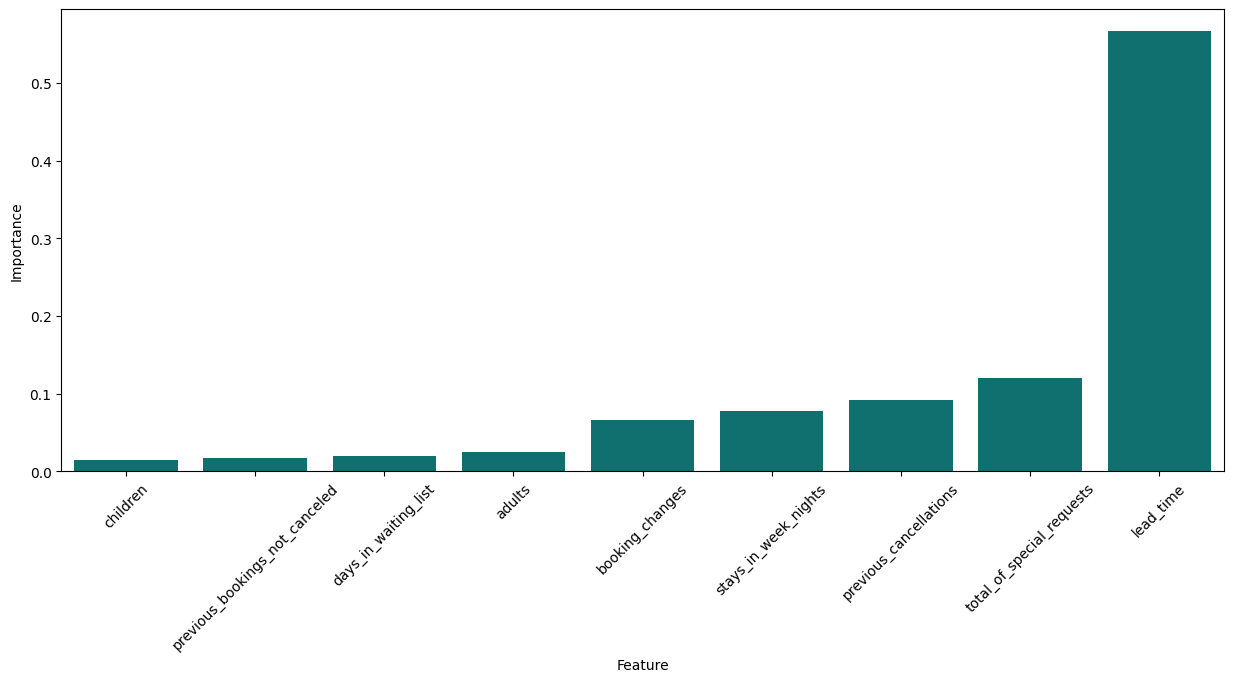

In [301]:
plt.figure(figsize = (15, 6))
sns.barplot(color = 'teal', x = feature_importance_df['Feature'], y = feature_importance_df['Importance'])
plt.xticks(rotation = 45)

### Final

In [3]:
data= pd.read_csv('/home/diwas/Documents/DevStuff/Hotel Booking Cancellation/data/raw/hotel_booking.csv')
data.shape  

(119390, 36)

In [9]:
import pandas as pd
import numpy as np
import logging
from sklearn.model_selection import train_test_split

# Define the subsystem classes
class RemoveUselessColumns:
    def process(self, data: pd.DataFrame):
        """
        Removes the columns that are not required

        Args:
            data: Raw data.
        
        Returns:
            data: Data after removing useless cols.
        """
        try:
            data = data.drop(columns =  ['name', 'email', 'credit_card', 'adr', 'company', 'arrival_date_year', 'stays_in_weekend_nights', 'babies', 'required_car_parking_spaces', 'reservation_status', 'meal', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'reserved_room_type', 'reservation_status_date', 'phone-number', 'agent','children', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adults', 'market_segment'], axis = 1)
            return data
        except Exception as e:
            logging.error(f'Error in  RemoveUselessColumns{e}')

class FindColsWithOutliers:
    def process(self, data: pd.DataFrame):
          """
          Uses IQR method to find features having outliers

          Returns:
              columns_with_outliers: List having names of featueres with outliers.
          """

          try:
              columns_with_outliers = []
              numeric_features = ['lead_time', 'stays_in_week_nights','previous_cancellations', 'booking_changes','total_of_special_requests']
              for feature in numeric_features:
                  Q1 = data[feature].quantile(0.25)
                  Q3 = data[feature].quantile(0.75)
                  IQR = Q3 - Q1
                  
                  # Identify columns with outliers
                  lower_bound = Q1 - 1.5 * IQR
                  upper_bound = Q3 + 1.5 * IQR
    
                  outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature]
    
                  if not outliers.empty:
                      columns_with_outliers.append(feature)
              return columns_with_outliers  
          except Exception as e:
            logging.error(f'Error in FindColsWithOutliers {e}')

class HandleOutliers:
    def process(self, data: pd.DataFrame, cols_with_outliers: list):
        """
        Handles outliers in the numeric data

        Args:
            data: Original DataFrame.
            cols_with_outliers: List of columns having outliers
        
        Returns: 
            None
        """
        try:
            for feature in cols_with_outliers:
                Q1 = data[feature].quantile(0.25)
                Q3 = data[feature].quantile(0.75)
                IQR = Q3 - Q1
        
                # Calculate upper and lower bounds
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
        
                # Replace outliers with bounds
                data[feature] = data[feature].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
        except Exception as e:
            logging.error(f'Error in HandleOutliers {e}')

class HandleMissingValues:
    """ Imputes the missig values in the data"""
    def process(self, data:pd.DataFrame):
        """ 
        Handles missing values in variables
        """
        try:
            data['distribution_channel'].replace('Undefined', data['distribution_channel'].mode()[0], inplace=True)
            data['country'].fillna(data['country'].mode()[0], inplace=True)
        except Exception as e:
            logging.error(f'Error in HandleMissingValues {e}')

class EncodeCategoricalColumns:
    """ Encode categorial variables with appropriate encoding techniques"""
    def process(self, data: pd.DataFrame):
        """
        Encodes categorial variables with relevant enoding techniques

        Returns:
            data: DataFrame with encoded variables.
        """
        try:
            top_countries = data['country'].value_counts().nlargest(10).index.tolist()
            top_room_type = data['assigned_room_type'].value_counts().nlargest(8).index.tolist()
            
            # Encode country variable
            country_encoded = pd.get_dummies(data['country'].apply(lambda x: x if x in top_countries else 'Other'), prefix='country', drop_first=True)
            other_vars_encoded = pd.get_dummies(data[['hotel', 'distribution_channel', 'deposit_type', 'customer_type']], drop_first = True)
            room_type_encoded = pd.get_dummies(data['assigned_room_type'].apply(lambda x: x if x in top_room_type else 'Other'), prefix='assigned_room_type', drop_first=True)
            
            # Remove vars from dataframe
            data = data.drop(columns = ['hotel', 'distribution_channel', 'deposit_type', 'customer_type','country','assigned_room_type'])
    
            # Concatenate encoded  with dataframe
            data = pd.concat([data, country_encoded, other_vars_encoded, room_type_encoded], axis=1)
    
            return data
        except Exception as e:
            logging.error(f'Error in EncodeCategoricalColumns {e}')

# class DataSplitter:
#     def process(self, data: pd.DataFrame):
#         """ 
#         Divids the proceseed data into training and testing sets

#         Args:
#             data: DataFrame
        
#         Returns:
#             X_train: Training fetures
#             X_test: Testing features
#             y_train: Training labels
#             y_test: Testing labales
#         """
#         try:
#             X = data.drop(columns = ['is_canceled'])
#             y = data['is_canceled']
#             X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#             return X_train, X_test, y_train, y_test
        # except Exception as e:
        #     logging.error(f'Error in DataSplitter {e}')

# Create a facade class
class DataPreprocessingFacade:
    def __init__(self):
        """ Initiate preprocessing steps"""
        self.remover = RemoveUselessColumns()
        self.outlier_finder = FindColsWithOutliers()
        self.outlier_handler = HandleOutliers()
        self.missing_handler = HandleMissingValues()
        self.encoder = EncodeCategoricalColumns()
        # self.data_splitter = DataSplitter()

    def preprocess_data(self, data):
        """ Implements preprocessing steps"""
        logging.info("Preprocessing data......")
        try:
            # Remove useless cols
            data = self.remover.process(data = data)
    
            # Find column with outliers
            columns_with_outliers = self.outlier_finder.process(data = data) 
    
            # Handle outlier cols
            self.outlier_handler.process(data = data, cols_with_outliers= columns_with_outliers)
    
            # Handle missing values
            self.missing_handler.process(data = data) 
    
            # Encode categorical columns
            preprocessed_data = self.encoder.process(data = data) 
    
            # Divide the data 
            # X_train, X_test, y_train, y_test = self.data_splitter.process(data = preprocessed_data)
            return preprocessed_data # TO remove
    
            return X_train, X_test, y_train, y_test
        except Exception as e:
            logging.error(f'Error in proprocessing data {e}')

# Step 3: Client code

if __name__ == "__main__":
    # Sample data
    data= pd.read_csv('/home/diwas/Documents/DevStuff/Hotel Booking Cancellation/data/raw/hotel_booking.csv')

    # Using the facade to preprocess the data
    facade = DataPreprocessingFacade()
    # X_train, X_test, y_train, y_test = facade.preprocess_data(data)
    data = facade.preprocess_data(data)

    # Display the processed data
    print("Processed Data:")
    print('')


Processed Data:



In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [6]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Iterate over each model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance 
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Testing set performance 
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(list(models.keys())[i])
    print('Model performance on training set')
    print(f'- Accuracy: {model_train_accuracy:.4f}')
    print(f'- F1 Score: {model_train_f1:.4f}')
    print(f'- Precision: {model_train_precision:.4f}')
    print(f'- Recall: {model_train_recall:.4f}')
    print(f'- ROC-AUC Score: {model_train_rocauc_score:.4f}')

    print('---------------------------------')

    print('Model performance for test set')
    print(f'- Accuracy: {model_test_accuracy:.4f}')
    print(f'- F1 Score: {model_test_f1:.4f}')
    print(f'- Precision: {model_test_precision:.4f}')
    print(f'- Recall: {model_test_recall:.4f}')
    print(f'- ROC-AUC Score: {model_test_rocauc_score:.4f}')

    print('======================================')


Logistic Regression
Model performance on training set
- Accuracy: 0.7837
- F1 Score: 0.6498
- Precision: 0.8074
- Recall: 0.5438
- ROC-AUC Score: 0.7339
---------------------------------
Model performance for test set
- Accuracy: 0.7857
- F1 Score: 0.6593
- Precision: 0.8183
- Recall: 0.5521
- ROC-AUC Score: 0.7392
Decision Tree
Model performance on training set
- Accuracy: 0.9525
- F1 Score: 0.9331
- Precision: 0.9708
- Recall: 0.8982
- ROC-AUC Score: 0.9412
---------------------------------
Model performance for test set
- Accuracy: 0.8115
- F1 Score: 0.7416
- Precision: 0.7648
- Recall: 0.7198
- ROC-AUC Score: 0.7933
Random Forest
Model performance on training set
- Accuracy: 0.9524
- F1 Score: 0.9344
- Precision: 0.9516
- Recall: 0.9178
- ROC-AUC Score: 0.9452
---------------------------------
Model performance for test set
- Accuracy: 0.8235
- F1 Score: 0.7566
- Precision: 0.7849
- Recall: 0.7304
- ROC-AUC Score: 0.8049


In [19]:
X = data.drop(columns = ['is_canceled'])
y = data['is_canceled']

In [22]:
from sklearn.model_selection import cross_val_score

In [28]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.802663539659938

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_params = {
    'criterion': ['gini', 'entropy'],
    'max_features': [5, 7, None, 8],
    'min_samples_split': [2, 8, 14, 20],
    'n_estimators': [100, 200, 250, 300]
}

clf = GridSearchCV(RandomForestClassifier(), rf_params, return_train_score = False).fit(X, y)
clf.cv_results_

In [39]:
cv_results = pd.DataFrame(clf.cv_results_)

In [40]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.190214,0.008513,0.015371,0.000961,gini,5,2,"{'criterion': 'gini', 'max_features': 5, 'min_...",0.692395,0.687034,0.700896,0.717648,0.721208,0.703836,0.013523,29
1,0.177118,0.008692,0.014481,0.000820,gini,5,8,"{'criterion': 'gini', 'max_features': 5, 'min_...",0.680543,0.699263,0.714884,0.730631,0.739132,0.712891,0.021163,20
2,0.217546,0.046846,0.017737,0.004601,gini,5,14,"{'criterion': 'gini', 'max_features': 5, 'min_...",0.708518,0.709230,0.721040,0.748430,0.729039,0.723252,0.014738,5
3,0.170149,0.008744,0.015682,0.003102,gini,5,20,"{'criterion': 'gini', 'max_features': 5, 'min_...",0.709691,0.710570,0.715554,0.748890,0.738881,0.724717,0.016092,3
4,0.229833,0.023662,0.015659,0.002104,gini,7,2,"{'criterion': 'gini', 'max_features': 7, 'min_...",0.689296,0.674973,0.706215,0.720747,0.725940,0.703434,0.019099,30
5,0.200178,0.010002,0.016546,0.001918,gini,7,8,"{'criterion': 'gini', 'max_features': 7, 'min_...",0.699430,0.694824,0.717397,0.730756,0.738043,0.716090,0.016903,16
6,0.175682,0.006822,0.013971,0.001779,gini,7,14,"{'criterion': 'gini', 'max_features': 7, 'min_...",0.715135,0.695661,0.721543,0.740682,0.737792,0.722163,0.016367,6
7,0.173974,0.005141,0.014726,0.001376,gini,7,20,"{'criterion': 'gini', 'max_features': 7, 'min_...",0.691850,0.701441,0.711115,0.742901,0.739760,0.717414,0.020481,14
8,0.559350,0.028710,0.017678,0.003593,gini,None,2,"{'criterion': 'gini', 'max_features': None, 'm...",0.693651,0.686280,0.697295,0.711157,0.718988,0.701474,0.011917,32
9,0.562927,0.061800,0.018647,0.004399,gini,None,8,"{'criterion': 'gini', 'max_features': None, 'm...",0.702111,0.696666,0.703451,0.726275,0.726568,0.711014,0.012784,21


In [43]:
cv_results[['param_criterion', 'param_max_features', 'param_min_samples_split', 'mean_test_score']] 

,param_criterion,param_max_features,param_min_samples_split,mean_test_score
0,gini,5,2,0.703836
1,gini,5,8,0.712891
2,gini,5,14,0.723252
3,gini,5,20,0.724717
4,gini,7,2,0.703434
5,gini,7,8,0.716090
6,gini,7,14,0.722163
7,gini,7,20,0.717414
8,gini,None,2,0.701474
9,gini,None,8,0.711014
